<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,63.026792,0.192169,166.992716,166.710567,0.282150
1,0.0,1.0,31.139984,90.801210,-0.153276,131.787918,131.953983,-0.166064
2,0.0,2.0,70.668177,50.130743,-1.035382,129.763538,130.725523,-0.961985
3,0.0,3.0,54.323744,64.680793,0.179655,129.184192,128.964687,0.219504
4,0.0,4.0,94.833967,92.592792,-0.033749,197.393010,197.362721,0.030289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.148627,45.713883,1.163643,109.026154,107.883057,1.143097
249996,999.0,246.0,30.978470,74.798423,-0.763519,115.013374,115.699608,-0.686233
249997,999.0,247.0,88.043661,66.637096,0.676875,165.357632,164.775786,0.581846
249998,999.0,248.0,51.997319,97.856215,-0.802287,159.051247,159.805802,-0.754556


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  63.026792  0.192169  166.992716  166.710567  0.282150
      1.0    31.139984  90.801210 -0.153276  131.787918  131.953983 -0.166064
      2.0    70.668177  50.130743 -1.035382  129.763538  130.725523 -0.961985
      3.0    54.323744  64.680793  0.179655  129.184192  128.964687  0.219504
      4.0    94.833967  92.592792 -0.033749  197.393010  197.362721  0.030289
...                ...        ...       ...         ...         ...       ...
999.0 245.0  52.148627  45.713883  1.163643  109.026154  107.883057  1.143097
      246.0  30.978470  74.798423 -0.763519  115.013374  115.699608 -0.686233
      247.0  88.043661  66.637096  0.676875  165.357632  164.775786  0.581846
      248.0  51.997319  97.856215 -0.802287  159.051247  159.805802 -0.754556
      249.0  67.611130  83.988624 -0.071032  161.528722  161.614309 -0.085587

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  63.026792  0.192169  166.992716  166.710567  0.282150
      1.0    31.139984  90.801210 -0.153276  131.787918  131.953983 -0.166064
      2.0    70.668177  50.130743 -1.035382  129.763538  130.725523 -0.961985
      3.0    54.323744  64.680793  0.179655  129.184192  128.964687  0.219504
      4.0    94.833967  92.592792 -0.033749  197.393010  197.362721  0.030289
...                ...        ...       ...         ...         ...       ...
999.0 245.0  52.148627  45.713883  1.163643  109.026154  107.883057  1.143097
      246.0  30.978470  74.798423 -0.763519  115.013374  115.699608 -0.686233
      247.0  88.043661  66.637096  0.676875  165.357632  164.775786  0.581846
      248.0  51.997319  97.856215 -0.802287  159.051247  159.805802 -0.754556
      249.0  67.611130  83.988624 -0.071032  161.528722  161.614309 -0.085587

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,63.026792,0.192169,166.992716,166.710567,0.282150
1,0.0,1.0,31.139984,90.801210,-0.153276,131.787918,131.953983,-0.166064
2,0.0,2.0,70.668177,50.130743,-1.035382,129.763538,130.725523,-0.961985
3,0.0,3.0,54.323744,64.680793,0.179655,129.184192,128.964687,0.219504
4,0.0,4.0,94.833967,92.592792,-0.033749,197.393010,197.362721,0.030289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.148627,45.713883,1.163643,109.026154,107.883057,1.143097
249996,999.0,246.0,30.978470,74.798423,-0.763519,115.013374,115.699608,-0.686233
249997,999.0,247.0,88.043661,66.637096,0.676875,165.357632,164.775786,0.581846
249998,999.0,248.0,51.997319,97.856215,-0.802287,159.051247,159.805802,-0.754556


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  63.026792  0.192169  166.992716  166.710567  0.282150
      1.0    31.139984  90.801210 -0.153276  131.787918  131.953983 -0.166064
      2.0    70.668177  50.130743 -1.035382  129.763538  130.725523 -0.961985
      3.0    54.323744  64.680793  0.179655  129.184192  128.964687  0.219504
      4.0    94.833967  92.592792 -0.033749  197.393010  197.362721  0.030289
...                ...        ...       ...         ...         ...       ...
999.0 245.0  52.148627  45.713883  1.163643  109.026154  107.883057  1.143097
      246.0  30.978470  74.798423 -0.763519  115.013374  115.699608 -0.686233
      247.0  88.043661  66.637096  0.676875  165.357632  164.775786  0.581846
      248.0  51.997319  97.856215 -0.802287  159.051247  159.805802 -0.754556
      249.0  67.611130  83.988624 -0.071032  161.528722  161.614309 -0.085587

[250000 rows x 6 columns]

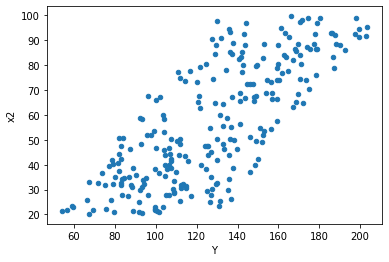

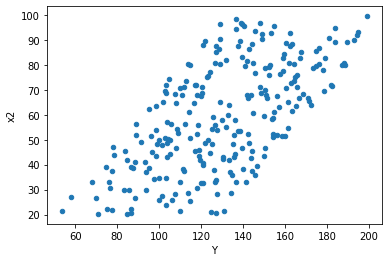

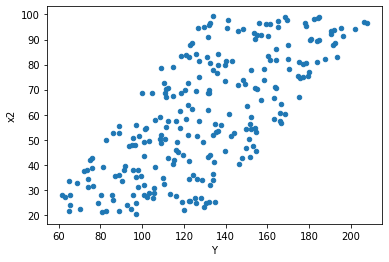

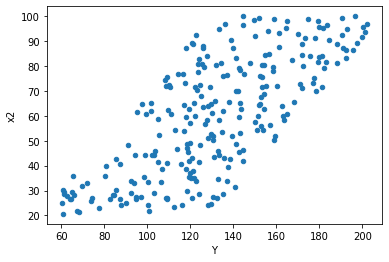

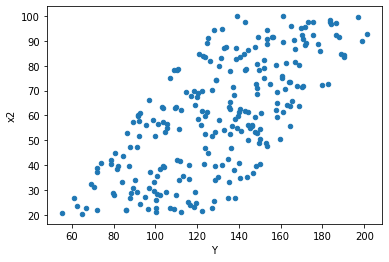

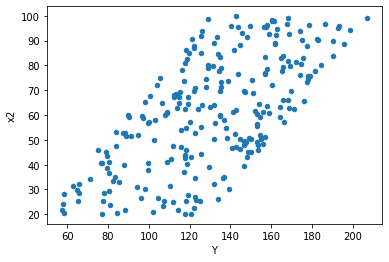

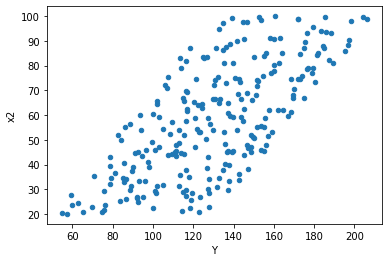

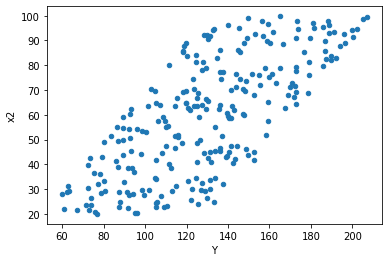

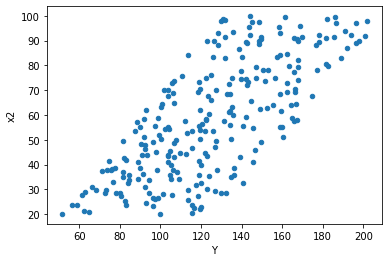

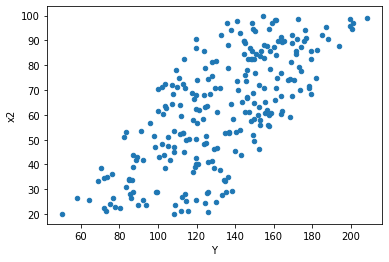

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,131.0,115.0,67.31107148030856,60.26785097532611,0.5138249731321264,0.5240682693506619,1.0199353802445517,0.9163292295043157,0.5418353852478421,0.45816461475215786,Reject001=1 : Homoscedasticity
1.0,128.0,118.0,56.98890538424472,75.01643369340238,0.44522582331441185,0.6357324889271387,1.4278877271640058,0.05031557736276304,0.9748422113186185,0.02515778868138152,Reject001=1 : Homoscedasticity
2.0,151.0,95.0,66.82425646539104,44.69091072079929,0.4425447448039142,0.4704306391663083,1.0630125985898893,0.7532049268862449,0.6233975365568776,0.3766024634431224,Reject001=1 : Homoscedasticity
3.0,141.0,105.0,64.5429033795001,54.049526684282355,0.45775108779787305,0.5147573969931653,1.1245356061730742,0.5276429428901173,0.7361785285549414,0.26382147144505863,Reject001=1 : Homoscedasticity
6.0,128.0,118.0,48.56282346629503,64.99040692683566,0.3793970583304299,0.5507661603969124,1.4516880094447946,0.040609991814754,0.979695004092623,0.020304995907377,Reject001=1 : Homoscedasticity
8.0,108.0,138.0,52.72524989612554,68.08295492258172,0.4881967582974587,0.49335474581580957,1.0105653866615971,0.9480670726699238,0.5259664636650381,0.4740335363349619,Reject001=1 : Homoscedasticity
9.0,119.0,127.0,47.65388673762403,88.61496828300146,0.400452829727933,0.697755655771665,1.7424165943482508,0.0021918468704991145,0.9989040765647504,0.0010959234352495573,Reject001=0 : Heteroscedasticity
12.0,135.0,111.0,62.99585516890411,54.356025031757454,0.4666359642141045,0.4896939192050221,1.0494131544913199,0.7952376484012849,0.6023811757993576,0.39761882420064243,Reject001=1 : Homoscedasticity
17.0,115.0,131.0,52.89976072993749,63.60095271179844,0.4599979193907608,0.4855034558152553,1.0554470691047364,0.7625871015441095,0.6187064492279453,0.38129355077205473,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,131.0,115.0,67.31107148030856,60.26785097532611,0.5138249731321264,0.5240682693506619,1.0199353802445517,0.9163292295043157,Reject001=1 : Homoscedasticity
1.0,128.0,118.0,56.98890538424472,75.01643369340238,0.44522582331441185,0.6357324889271387,1.4278877271640058,0.05031557736276304,Reject001=1 : Homoscedasticity
2.0,151.0,95.0,66.82425646539104,44.69091072079929,0.4425447448039142,0.4704306391663083,1.0630125985898893,0.7532049268862449,Reject001=1 : Homoscedasticity
3.0,141.0,105.0,64.5429033795001,54.049526684282355,0.45775108779787305,0.5147573969931653,1.1245356061730742,0.5276429428901173,Reject001=1 : Homoscedasticity
4.0,135.0,111.0,77.72426169456894,44.15745906587072,0.5757352718116218,0.3978149465393758,0.6909685162897911,0.040529145276869634,Reject001=1 : Homoscedasticity
5.0,129.0,117.0,59.72470779131558,47.74764128291518,0.46298223094043084,0.4080994981445742,0.8814582307308505,0.48339073353027806,Reject001=1 : Homoscedasticity
6.0,128.0,118.0,48.56282346629503,64.99040692683566,0.3793970583304299,0.5507661603969124,1.4516880094447946,0.040609991814754,Reject001=1 : Homoscedasticity
7.0,140.0,106.0,62.8452830940317,35.59252083404213,0.4488948792430836,0.33577849843435975,0.7480114253041645,0.10792483190221676,Reject001=1 : Homoscedasticity
8.0,108.0,138.0,52.72524989612554,68.08295492258172,0.4881967582974587,0.49335474581580957,1.0105653866615971,0.9480670726699238,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64